## Test report

We compare here the computation time for Option 1 with and without converting the output vector to an array and sending it back to Python. This is just a quick test to measure how long it takes to compute these last two steps, and see if the difference is significant. At first sight, the difference is big enough to consider other approaches (e.g., PyBind11) that can be more efficient.

A comparison between option 1 and option 3 also shows that sending the vector from Python as an array instead of point per point is faster to compute.

In [1]:
def generate_powers_of_10(list_length):
    """
    Generate a list of powers of 10, i.e., [1, 10, 100, ...]

    :param list_length: int, wished list length
    :return: list, containing powers of 10
    """
    powers_of_10 = []
    power = 1
    while len(powers_of_10) < list_length:
        powers_of_10.append(power)
        power *= 10

    return powers_of_10

# X-Axis: 
# Number of rows in the processed vector
n_rows = generate_powers_of_10(8)

# Y-Axis:
# Processing time with Option 1
option_1 = [
    0.000069,
    0.000050,
    0.000065,
    0.000280,
    0.001872,
    0.019271,
    0.294663,
    3.739805,
]

# Y-Axis:
# Processing time with Option 1 without return, e.g.,
# without converting the QVector back to array and sending it back to Python
option_1_without_return = [
    0.000044,
    0.000047,
    0.000066,
    0.000151,
    0.001022,
    0.009833,
    0.112159,
    1.029216,
]

option_3 = [
    0.000077,
    0.000047,
    0.000197,
    0.000595,
    0.005203,
    0.053600,
    0.612160,
    6.772206,
]

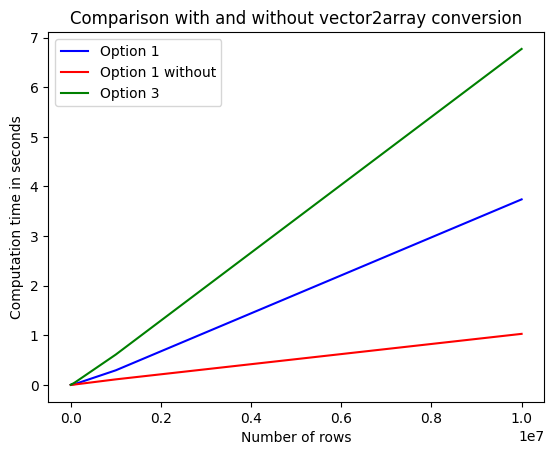

In [2]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure()

# Plot the first set of values with blue color
plt.plot(n_rows, option_1, label='Option 1', color='blue')

# Plot the second set of values with red color
plt.plot(n_rows, option_1_without_return, label='Option 1 without', color='red')

# Plot the third set of values with red color
plt.plot(n_rows, option_3, label='Option 3', color='green')

# Add labels and legend
plt.xlabel('Number of rows')
plt.ylabel('Computation time in seconds')
plt.title('Comparison with and without vector2array conversion')
plt.legend()

# Display the plot
plt.show()